# 1. JavaFX

Throughout Java’s history, there have been multiple libraries for creating GUIs (pronounced “GOO-ee”).  Here, we’ll focus on the latest and greatest -- called JavaFX.

> Please note: JavaFX library is not part of Java's standard library, so you need to install it separately in your computer before compiling/executing Java files (files that imported JavaFX library) in command prompt. Instruction on installing JavaFX and running JavaFX related Java files can be found in the bottom of this notes in Appendix Section.

## 1.1. Stage and Scene on GUI

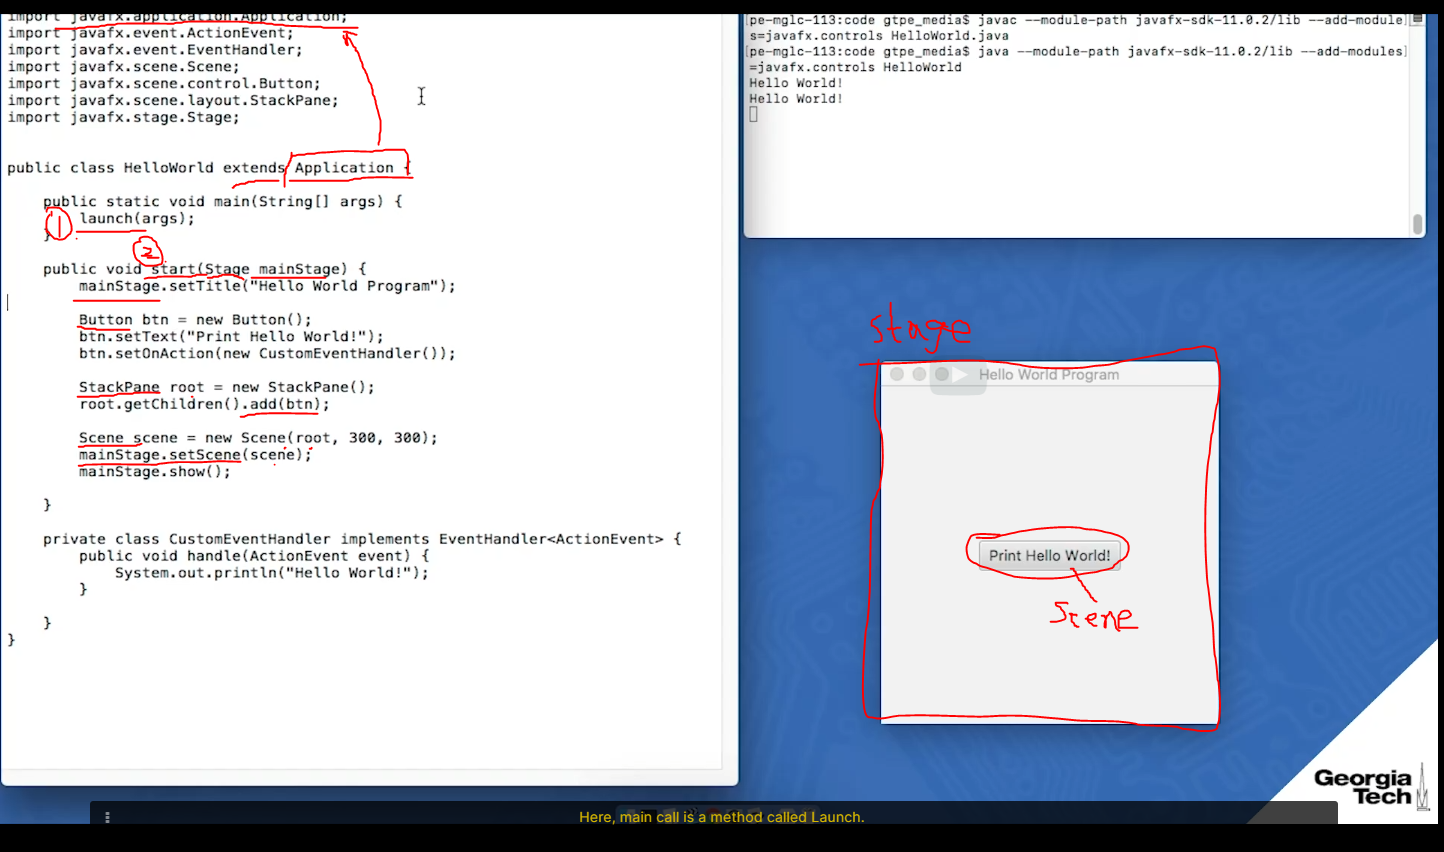

- The above example created a GUI with a button inside to print "Hello World" in the terminal.
- GUI is a window shown at the right side, we call the window **"Stage"**
- The actual object shown inside the Stage is called **"Scene"**, here the scene is a button to print "Hello World".
- Under the code:
    - 1. "main" method call the "launch" method, which is a method in "Application" superclass. (current class extends the super class "Application" as shown above)
        - VIP NOTE!!! This "main" method is Optional for JavaFX program.
        - JavaFX program automatically calls the "start" method below.
        - "main" method is only mandatory when it is the "terminal-based" java program (i.e. not GUI based, i.e. input/output is all at terminal like command prompt)
    - 2. inside "launch" method source code, it will call the **abstract** method "start" in Application class, and here we **override** the "start" abstract method to complete it/customize as we need (as shown above)
        - "start" method accepted a **"Stage"** parameter, which is named as "mainStage" by this code. This main stage corresponds the final GUI window shown at the right side.
        - at mainStage, we need to add a **scene** to it. 
        - The first step is to create a "Button" class object. Button's method .setOnAction() will make sure once button is clicked, it will trigger the action defined in its (), which is to instantiate a new instance of "CustomEventHandler" class in example above.
        - After button is created, we need a middle step before adding button object to Scene. This middle step is to add this Button object to "StackPane". 
            - The **StackPane** class represents **one kind of layout class** for a scene in our application.
            - Each element that is added to StackPane is laid on top of the previously added element. 
            - You can use this kind of layout to create a certain **layered effect** in Scene.
        - After Button is added to StackPane layout, we can create a Scene object using StackPane layout.
            - 300, 300 in example above represents the size of the scene.
        - Finally, we can add the Scene to mainStage, using mainStage.setScene() method.
        
    - 3. Inside "CustomEventHandler" class (which is initiated from "Button" class in Step 2. above)
        - This class implements the interface called "EventHandler"
        - This class is defined as a private inner class inside "HelloWorld" public class because this class is only used inside of "HelloWorld" java program in this example, i.e. only triggered by "Button" defined above
        - \<ActionEvent> object type was specified in interface's type parameter \<>
        - ActionEvent class is one of the childclass of "Event" superclass, it corresponds to "clicking button action" specifically - i.e. Button Events
        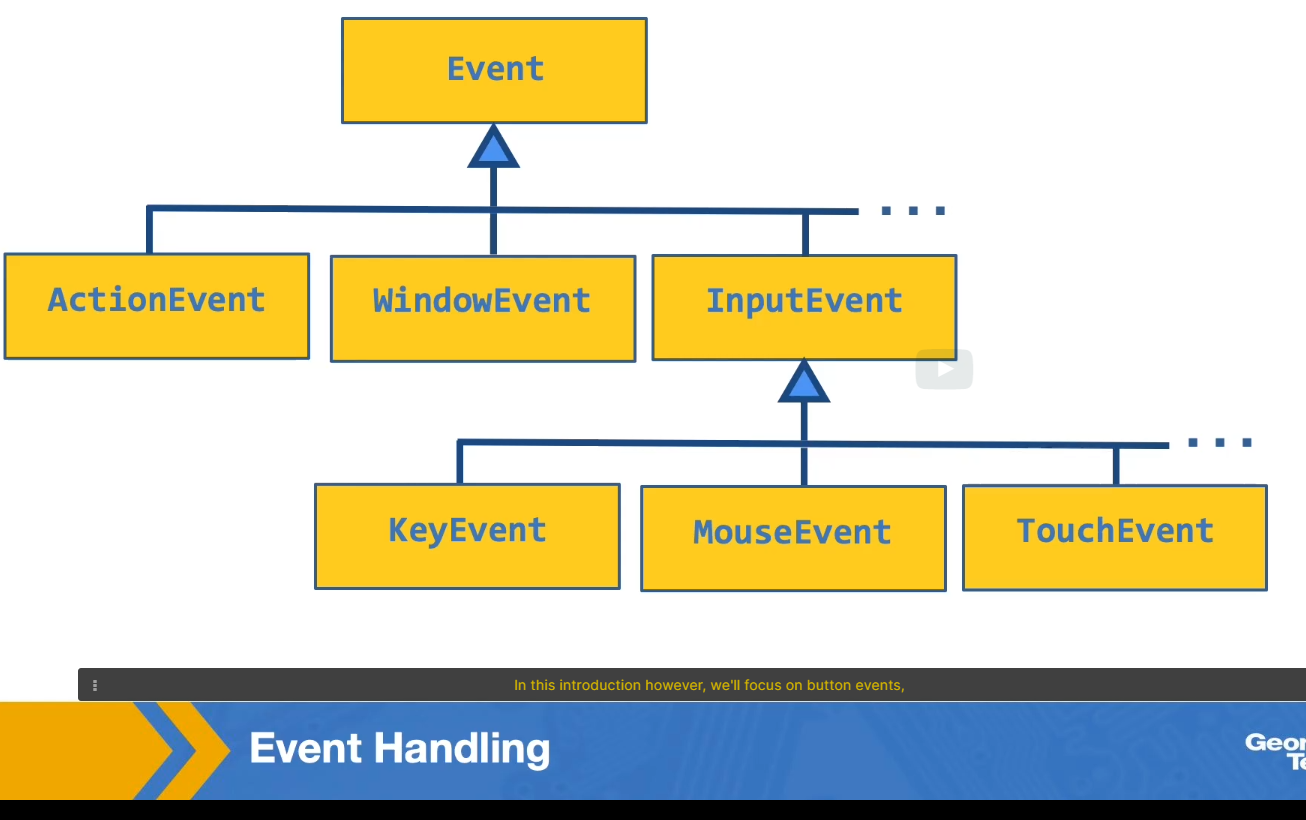
        - The "EventHandler" interface has an abstract method called "handle". When implementing this interface, just like all other interface's abstract method's behaviour, it forces user to define/complete the abstract method "handle" inside the class that implemented the interface ("CustomEventHandler" class here)
            - Here user complete the "handle" method by a statement to print ("Hello World!")
        > Note: "EventHandler" interface only has one abstract method called "handle" (shown above), such interface that only has **one abstract method** is called **"Functional Interface"**
        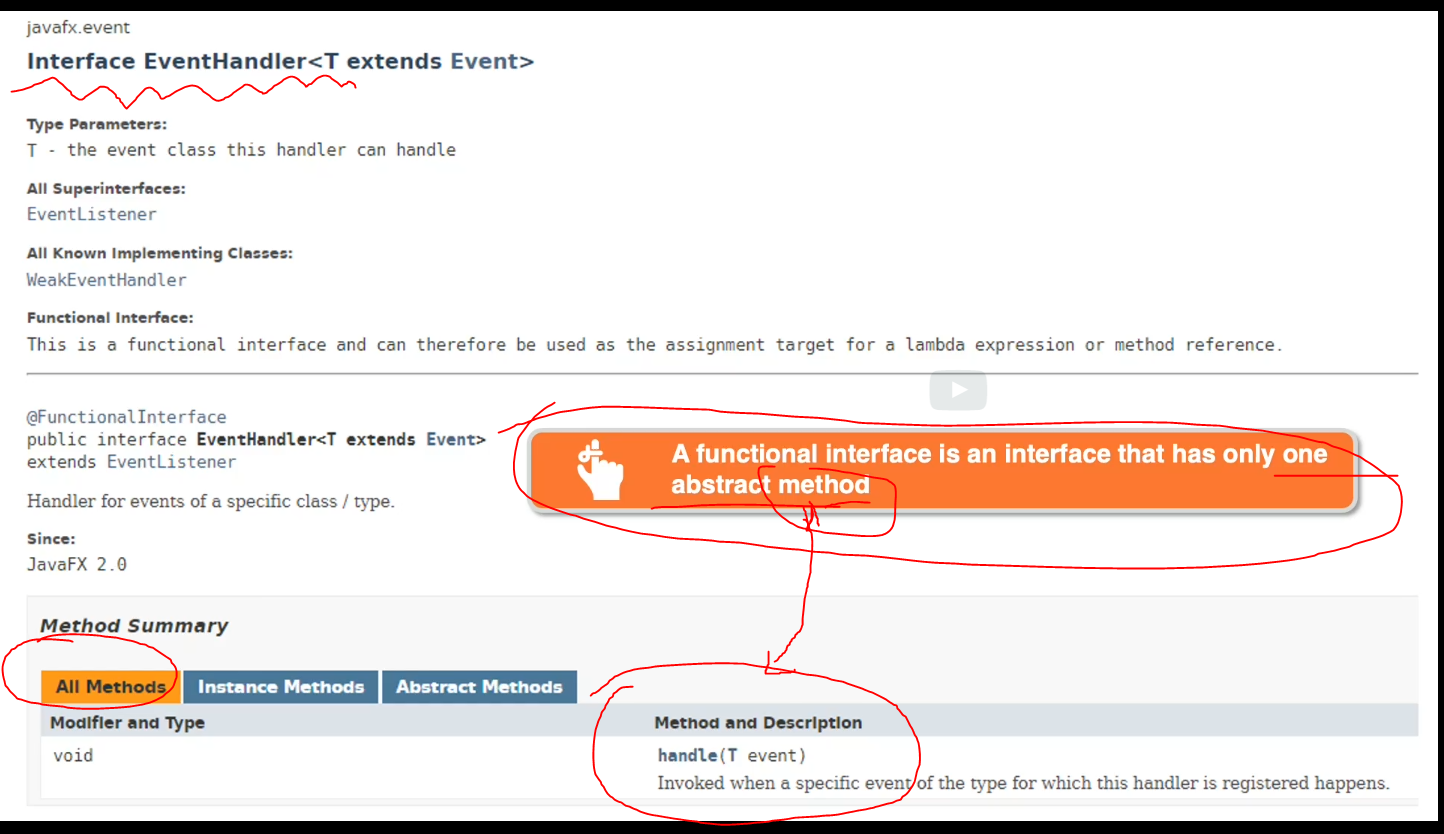

## 1.2. More about "Layout" class from above example

As mentioned above, the StackPane class represents one kind of layout class for a scene in our application

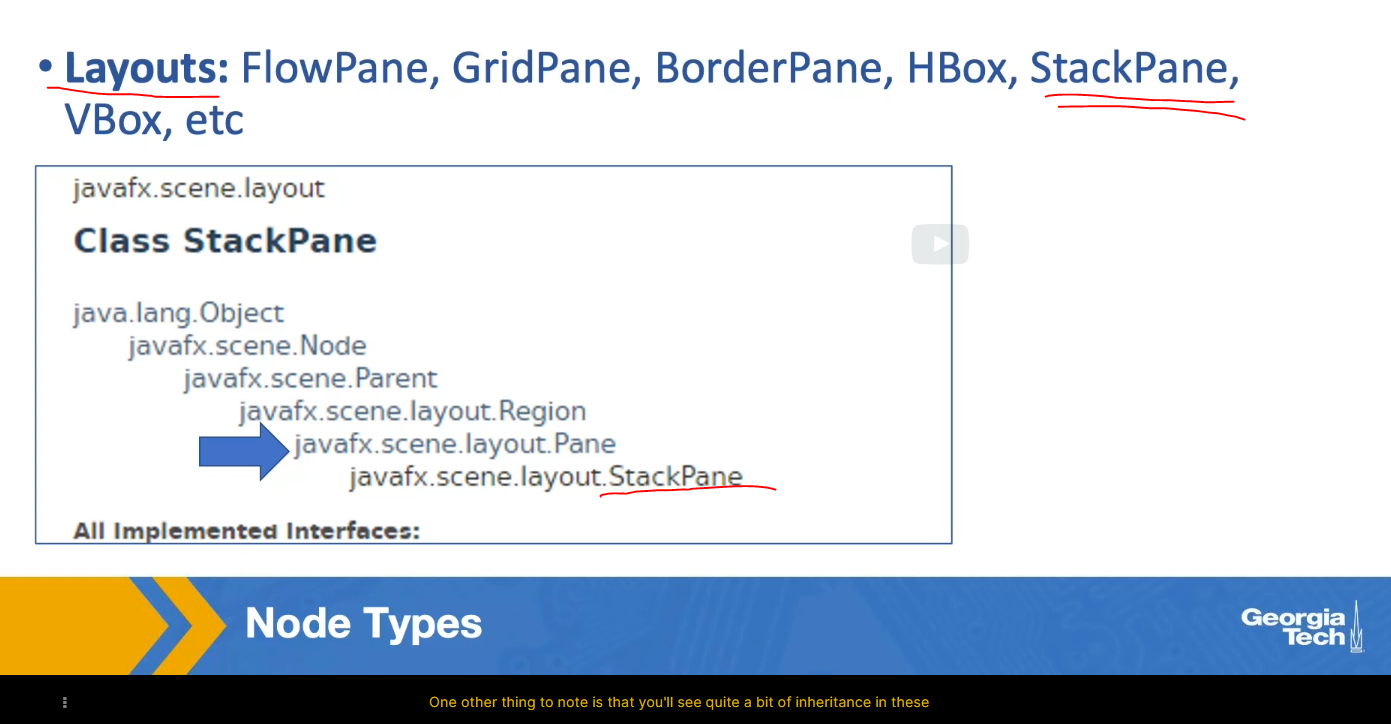

## 1.3. Scene Graph

Scene graphs represent relationships between the UI components that make up a GUI.
- Each components in Scene Graph below can be treated as a **"Node"**
    - e.g. root node, btn node, ...

Example 1 - Scene Graph of "HelloWorld" example above:
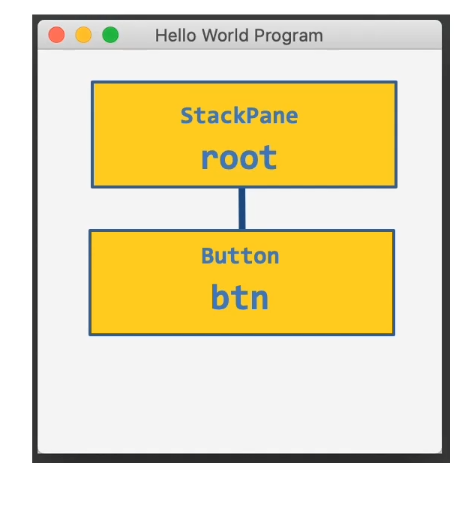

Example 2 - Scene Graph of a StackPane that include multiple Buttons objects as its elements

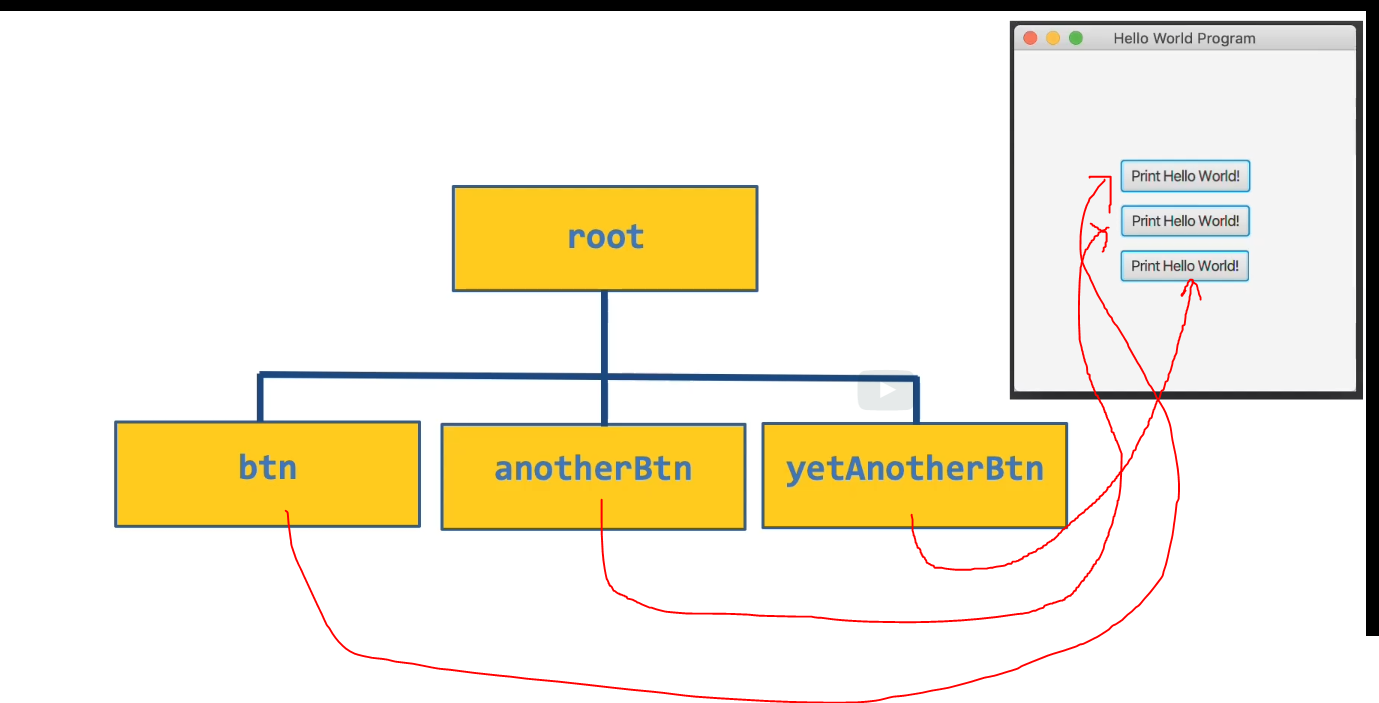

## 1.4. Annoymous Inner Class

Purpose:
- Note in above example, "CustomEventHandler" is only used for "HelloWorld" class itself.
- Java has another way of defining single use classes in a more concise way. Such classes are called **anonymous inner classes**.
- And with them we can instantiate an object and define it very class in a single expression

Example:
- LHS is the above example where we defined a class for eventhandler
- RHS is to use Annoymous Inner Class to achieve the same results
    - Please note: since annoymous inner class is an expression, we end the class like normal with curly brace "}", but also need a ";" at the end. (LHS did not have ";" at the end of the class definition for CustomEventHandler)
    - VIP Note: For the variable "handler" declaration + Instantiation code line (i.e. EventHandler\<ActionEvent> handler = new EventHandler<>()), normally we wouldn't be able to instantiate an object with interface type (EventHandler is an interface), we normally can only do it for class type; But since we're providing the definition of the actual class that implements the interface right away for this annoymous inner class (i.e. {public void handle (xxx)...}). The code is considered as legal by Java. (This is a special feature of the Annoymous Inner Class)
    - VIP Note2: For the variable "handler" declaration + Instantiation code line (i.e. EventHandler\<ActionEvent> handler = new EventHandler<>()) -> You will notice that the format is exactly like what we did for **ArrayList**, where you can **omit the right hand side's parameterized type** in <> (Details see: Module_9_L17_Lists -> 1.1.2. Parameterized Type)

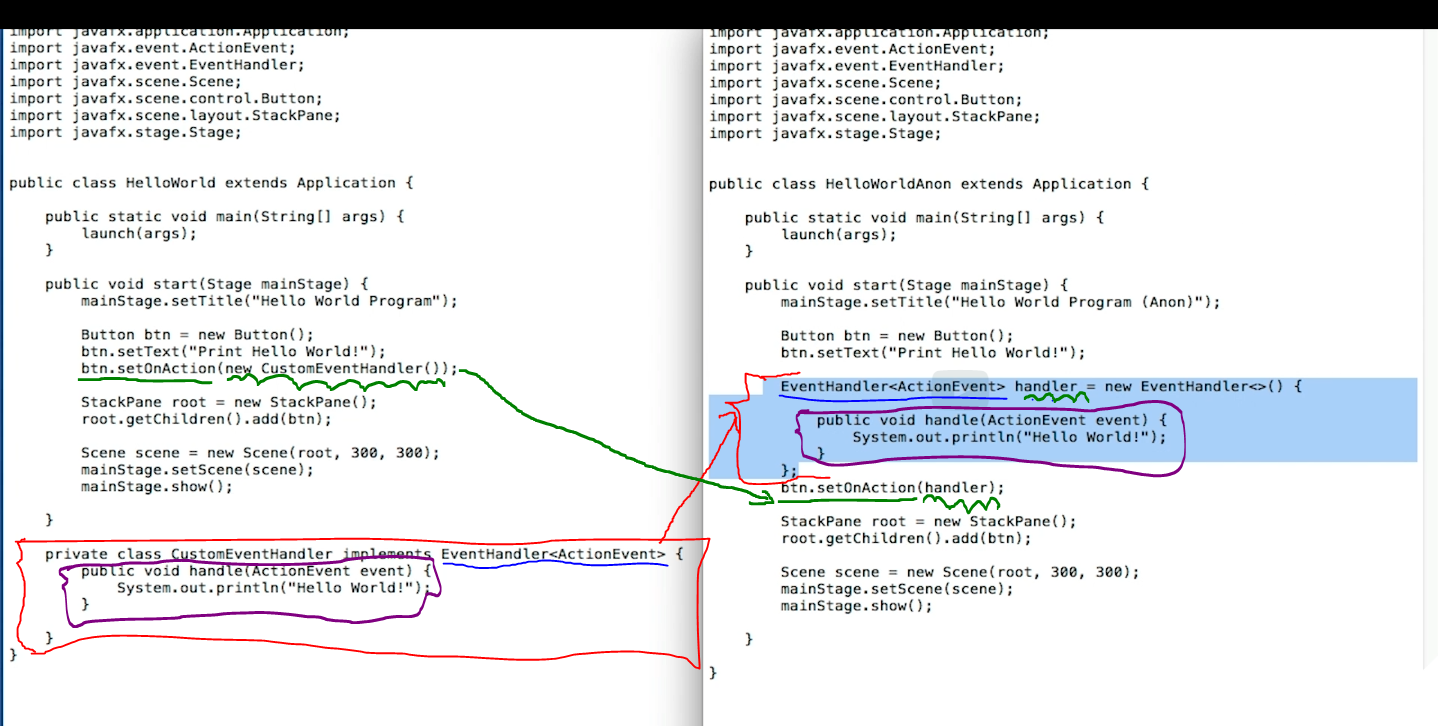

Alternatively, we can also omit the "handler" variable, and further simplify the code like below (see RHS):
- Because we only use handler once, we don't really need to declare this variable.
- We can create an instance of our anonymous class right in the setOnAction method.
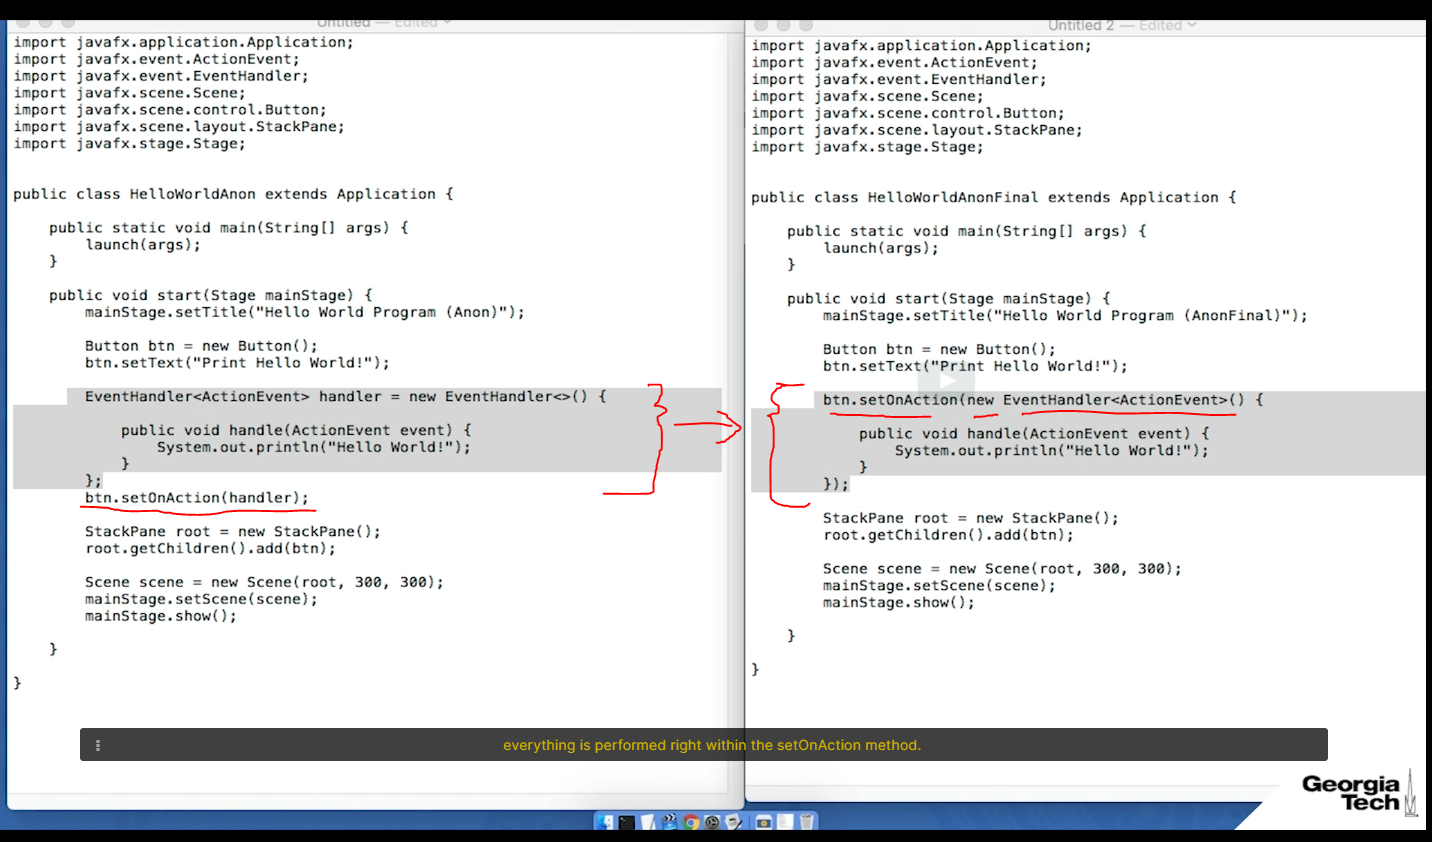

## 1.5. Lamda Expressions

In above example, we used Annoymous Inner Class to simplify the code. Furthermore, we can make the code more concise by using Lambda Expressions.

- Format: 
> (optional list of parameters) -> {behavior}

- Lambda Expressions can omit the need to write the method header, instead, it can directly define the method implementation part of the functional interface abstract method.
    - For example below, LHS is the annoymous inner class method, RHS is the Lambda Expression to achieve the same results.
    - The blue highlights in LHS is omitted in the RHS.
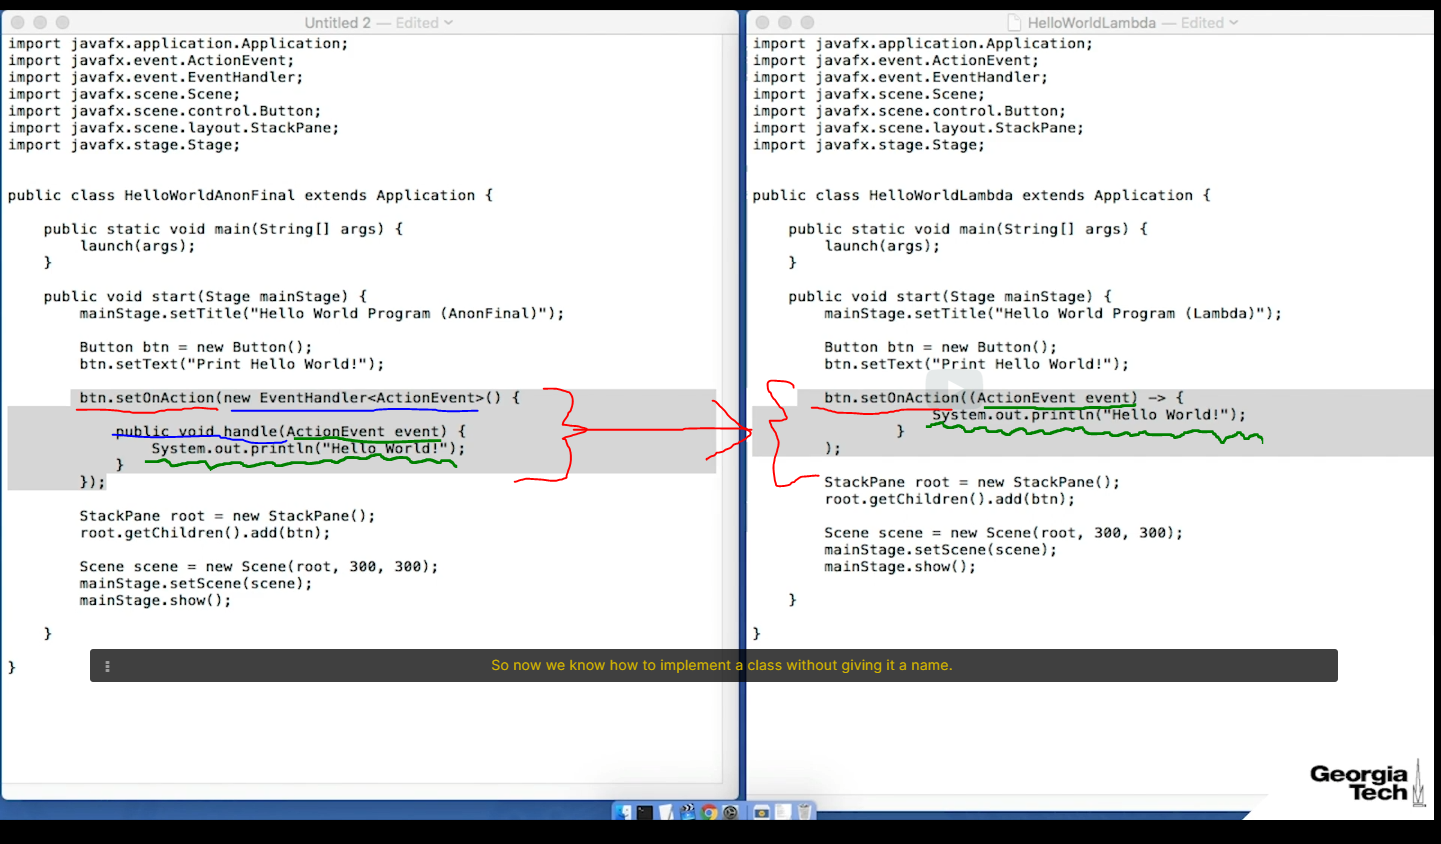


- When used for Interface, Lambda Expression can ONLY be used for "Functional Interface" (i.e. interface that only has **ONE Abstract Method**)
    - Like mentioned in section 1.1. above, "EventHandler" interface only has one abstract method, so it is "Functional Interface". That's why we can use Lambda Expression instead of Annoymous Inner Class here.
    

- VIP Notes: You will notice that in above RHS example, we did not even reference the Interface's name "EventHandler" when using Lambda Expression, how can Lambda Expression know it is used for "EventHandler" interface's abstract method: "handle"? 
    - -> I guess it is because the formal parameter we passed ("event") is of type = "ActionEvent", which matches the type parameter of EventHandler... *(But I did not 100% understand the backend logic)*
    - -> Details see: https://stackoverflow.com/a/58457792

- Alternatively, we can also choose to
    - 1. omit the "ActionEvent" formal parameter type in the Lambda Expression, because Java can deduce the type given that the interface only has one method. (Again, I did not 100% understand the backend logic, but it is what it is)
    - 2. If that method's definition only consists of a **single line** (which it is for this customized "handle" method), we can omit the curly braces {} as well.
        - After curly braces {} is removed, by syntax, we should also remove the ";" after println()
    - See Example below, it is the Lambda Expression with "ActionEvent" parameter type being omitted compared to above Lambda Expression example, as well as omitted the curly braces {}
    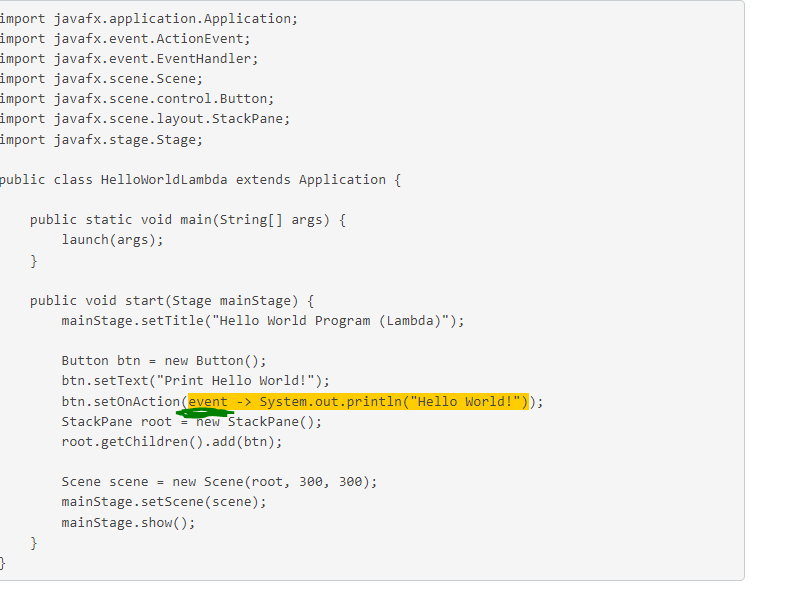
    

> NOTE: (not 100% understand the backend logic) 

> When using Lambda Expression as the last example screenshot above, since both "EventHandler" and "ActionEvent" are both omitted in the main code, therefore we can also omitted the "import xxx" for these two classes. Java will approve this syntax.
> - Similar Example can also be found in the Section 3. JavaFX GUI Practice Problem - Making a Temperature Conversion GUI program.

# 2. More Advanced GUI of JavaFX

## 2.1. Built-in Layout object

https://docs.oracle.com/javafx/2/layout/builtin_layouts.htm

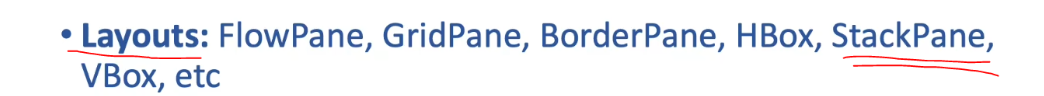

## 2.2. Built-in Control Object


https://docs.oracle.com/javase/8/javafx/user-interface-tutorial/ui_controls.htm


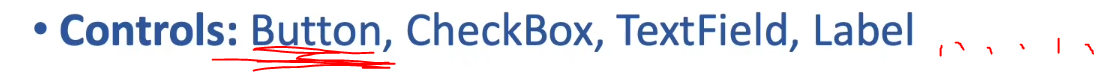

# 3. JavaFX GUI Practice Problem - Making a Temperature Conversion GUI program

- see "TemperatureConverterGUI.java" file in current folder.

# Appendix: Installing JavaFX and Running (Compiling/Executing) JavaFX related Java Files

It's now time to install JavaFX on your computer so that you can start playing around with HelloWorld and future examples.  This process will take a couple of steps since  JavaFX has been split into its own standalone module as of Java 11.

The first step is to download the package that fits your particular machine here: https://gluonhq.com/products/javafx/ (Links to an external site.)

The download should be a compressed file that you need to extract into the same folder as your test programs. 

Afterwards, you should be able to compile your GUI application like below in command prompt (replace HelloWorld.java to your desired file name):

> javac --module-path javafx-sdk-11.0.2/lib --add-modules=javafx.controls HelloWorld.java

If your javafx-sdk-11.0.2 folder is in a different folder than your program, you should add the entire path name in order to avoid a "module not found" error.  

On a Mac, for example, I might have the following for module-path:

> /Users/omojokun/cs1331/javafx/javafx-sdk-11.0.2/lib

On a PC, I could have:

> C:\Users\omojokun\cs1331\JavaFx\javafx-sdk-11.0.2\lib

For me, I saved it at:

> D:\ProgramData\JavaFX\javafx-sdk-18.0.1\lib

Running JavaFX applications is very similar. In command prompt, we use the same command that we did for compiling, but with java instead of javac, and without the .java just like normal.

> java --module-path javafx-sdk-11.0.2/lib --add-modules=javafx.controls HelloWorld